In [1]:
import os
from mdagent import MDAgent

In [2]:
prompt13 = "Download the PDB file for 1C3W and describe the secondary structure. Then, simulate the protein at 300 K for 1 ns. Plot the RMSD over time and the radius of gyration over time."
llm_var = "claude-3-opus-20240229"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools, use_memory=False)
print(llm_var)

claude-3-opus-20240229


In [3]:
agent.run(prompt13)

Thought: To answer this question, I will need to download the PDB file for 1C3W, analyze its secondary structure, set up and run a 1 ns simulation at 300 K, and then plot the RMSD and radius of gyration over time. I will start by downloading the PDB file.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1C3W"
}
```

PDB file found with this ID: 1C3W
Thought: Now that I have the PDB file, I will analyze the secondary structure using the ComputeDSSP tool.

Action:
```
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "",
    "top_file": "1C3W_193207",
    "target_frames": "first"
  }
}
```Error loading trajectory:  Sorry, no loader for filename=Name not found in path registry. (extension=.) was found. I can only load files with extensions in dict_keys(['.inpcrd', '.restrt', '.rst7', '.ncrst', '.arc', '.dcd', '.dtr', '.stk', '.pdb.gz', '.pdb', '.gro', '.hdf5', '.h5', '.lammpstrj', '.lh5', '.crd', '.mdcrd', '.ncdf', '.netcdf', '.nc', '.cif', '.pdbx', '.trr

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [4]:
registry = agent.path_registry
print(os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_51
Files found in registry: 1C3W_193207: PDB file downloaded from RSCB
 PDBFile ID: 1C3W_193207
 1C3W_193243: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_193256: Initial positions for simulation sim0_193256
 sim0_193256: Basic Simulation of Protein 1C3W_193243
 rec0_193305: Simulation trajectory for protein 1C3W_193243 and simulation sim0_193256
 rec1_193305: Simulation state log for protein 1C3W_193243 and simulation sim0_193256
 rec2_193305: Simulation pdb frames for protein 1C3W_193243 and simulation sim0_193256
 rec0_043015: dssp values for trajectory with id: rec0_193305
 rmsd_1C3W: RMSD for 1C3W
 fig0_043027: RMSD plot for 1C3W
 rgy_rec0_193305: Radii of gyration per frame for rec0_193305
 fig0_043035: Plot of radii of gyration over time for rec0_193305


In [5]:
import os
from IPython.display import Image

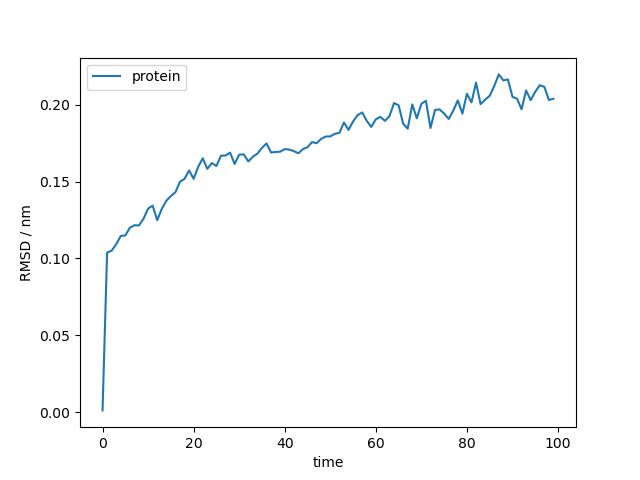

In [8]:
RMSD_plot = registry.get_mapped_path("fig0_043027")
assert os.path.exists(RMSD_plot), "Path does not exist"
Image(filename=RMSD_plot)

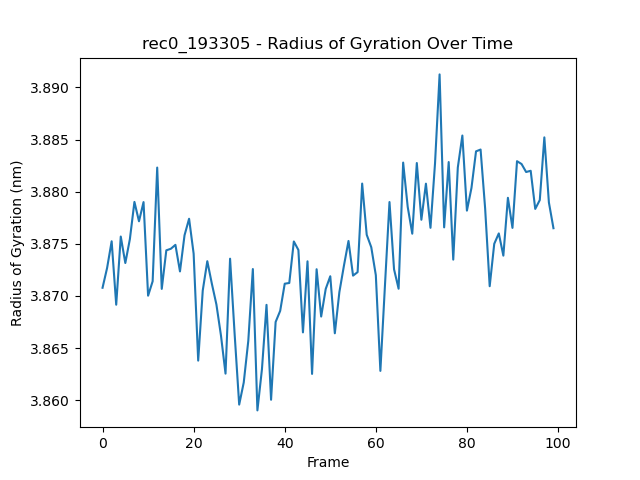

In [12]:
rgy = registry.get_mapped_path("fig0_043035")+".png"
assert os.path.exists(rgy), "Path does not exist"
Image(filename=rgy)

In [15]:
#dssp
import mdtraj as md

traj = md.load(registry.get_mapped_path("top_sim0_193256"))
top = traj.topology
number_of_chains = top.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of residues in chains: ",number_of_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of residues in chains:  2
Number of residues in sheets:  6
Number of residues in helices:  161
Number of residues in coils:  55
